<IPython.core.display.Javascript object>


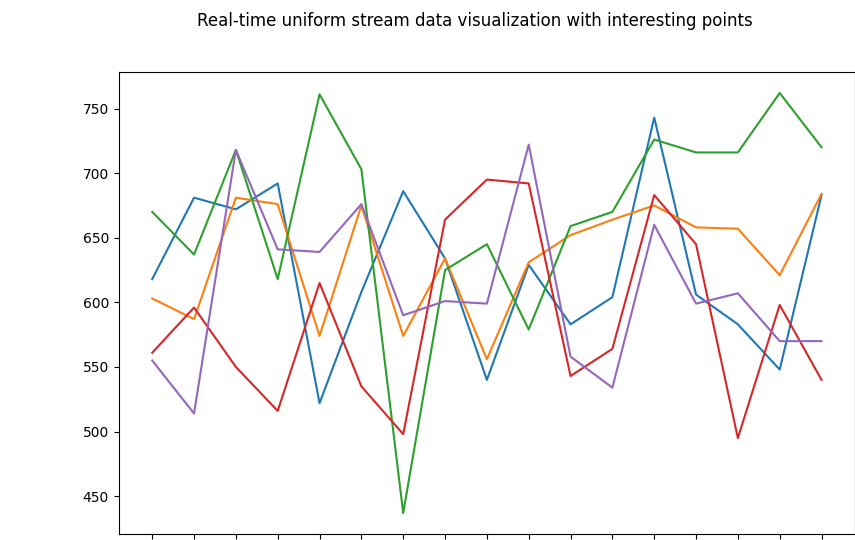

In [ ]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib.pyplot as plt
import statistics
import json
import time

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'memory'

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000,
                                   auto_offset_reset='earliest',
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        fig.subplots_adjust(hspace=0.8)
        ax1 = fig.add_subplot(111)
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Value')
        fig.suptitle('Real-time uniform stream data visualization with interesting points') # giving figure a title
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax1
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax1):
    #try:
        msglist, lm4, lm5, lm6, lm7, lm8 = [], [], [], [], [], []
        ts_list = []
        
        for message in consumer: 
            if(len(msglist) == 12):
                current_time = time.strftime("%H:%M:%S", time.localtime(time.time()))
                ts_list.append(str(current_time))
                m4, m5, m6, m7, m8 = [], [], [], [], []

                for message in msglist:
                    ts = []
                    data = json.loads(message.value.decode('UTF-8'))
                    for x in data:
                        if(x['machine'] == 4):
                            m4.append(x)
                        if(x['machine'] == 5):
                            m5.append(x)
                        if(x['machine'] == 6):
                             m6.append(x)
                        if(x['machine'] == 7):
                            m7.append(x)
                        if(x['machine'] == 8):
                            m8.append(x)
                lm4.append(len(m4))
                lm5.append(len(m5))
                lm6.append(len(m6))
                lm7.append(len(m7))
                lm8.append(len(m8))
                msglist = []
            else:
                ax1.clear()
                ax1.plot(ts_list, lm4)
                ax1.plot(ts_list, lm5)  
                ax1.plot(ts_list, lm6)  
                ax1.plot(ts_list, lm7)  
                ax1.plot(ts_list, lm8)  
                fig.canvas.draw()
            msglist.append(message)

    #except Exception as ex:
    #     print(str(ex))
            
if __name__ == '__main__':    
    consumer = connect_kafka_consumer()
    fig, ax1 = init_plots()
    consume_messages(consumer, fig, ax1)